In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy
import random
import sympy
from sympy import *
from scipy.optimize import minimize

# Method of steepest descent

first-order iterative optimization algorithm

In [2]:
def method_of_steepest_descent(function, diapason, n, i_max, x0):
    #t = n + 1
    grad_f, x = gradient(function, n+1)
    steps = []
    k = 0
    
    for i in range(0, i_max):
        steps.append((x0[0], x0[1]))
        grad_f_x0 = []
        for i in range(0, len(grad_f)):
            grad_f_x0.append(grad_f[i].subs(list(zip(x,x0))))
        if all(abs(np.array(grad_f_x0)) < 1e-05):
            x_min = x0
            break
        def f():
            return lambda p: function(x0-p*np.array(grad_f_x0))
        p0 = (minimize(f(), 0, method='SLSQP').x[0])
        x1 = x0 - p0*np.array(grad_f_x0)
        if all(x1 == x0):
            return k, x0, steps
            break
        for i in x1:
            if i >= diapason or i <= -diapason:
                return k, x0, steps
                break

        k+=1
        x0 = x1
        x_min = x0
    return k, x_min, steps

In [3]:
def f_plot(function, diapason):
    fig = plt.figure(figsize=(4,4))
    qf = fig.gca(projection='3d')
    size = 50
    x1 = list(np.linspace(-diapason, diapason, size))
    x2 = list(np.linspace(-diapason, diapason, size))
    x1, x2 = np.meshgrid(x1, x2)
    x3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x3[i,j] = function((x1[i,j],x2[i,j]))
    qf.plot_surface(x1, x2, x3, rstride=1, cstride=1, cmap='Spectral', linewidth=0)
    return x1, x2, x3

In [4]:
def contoursteps(x1, x2, x3, steps=None):
    fig = plt.figure(figsize=(4,4))
    cp = plt.contour(x1, x2, x3, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')

In [5]:
def gradient(function, n):
    x = symbols('x1:%s'%n)
    f = function(x)
    grad_f = []
    for i in range(0, len(x)):
        grad_f.append(diff(f, x[i]))
    return grad_f, x

## Target cost functions

### Himmelblau function

$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$



local min:
1. (3, 2)
2. (-2.805118..., 3.131312...)
3. (-3.779310..., -3.283186...)
4. (3.584428..., -1.848126...)

Range: [-5.12, 5.12]

In [6]:
def f_himmelblau():
    return lambda x: (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

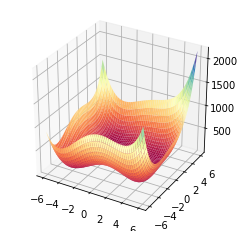

In [7]:
x1, x2, x3 = f_plot(f_himmelblau(), 6)

### Sphere model (DeJong №1)
$f(x)=\sum_{i=1}^n x_i^2$

in our case

$f(x,y)=x^2+y^2$


local min: (0, 0)

Range: [-5.12, 5.12]

In [8]:
def f_spherical():
    return lambda x: x[0]**2+x[1]**2

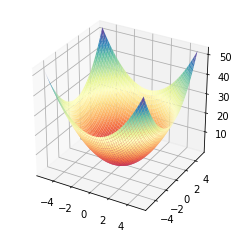

In [9]:
x1, x2, x3 = f_plot(f_spherical(), 5.12)

### Multimodal function #1
$f(x,y)=x^2+y^2-cos(18x)-cos(18y)$

Has many local mins

Range: [-1, 1]

In [10]:
def f_multimodal():
    return lambda x:  x[0]**2+x[1]**2-cos(18*(x[0]))-cos(18*(x[1]))

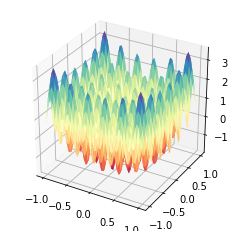

In [11]:
x1, x2, x3 = f_plot(f_multimodal(), 1)

## Demonstration of the work of the algorithm on  


>Himmelblau function:

$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

In [12]:
k_himmelblau, x_min_himmelblau, steps_himmelblau = method_of_steepest_descent(f_himmelblau(), 6, 2, 1000, np.array([3, -3]))
print('Himmelblau predicted: [3.584428, -1.848126]')
print(x_min_himmelblau, k_himmelblau)

Himmelblau predicted: [3.584428, -1.848126]
[3.58467961260248 -1.84873245450903] 11


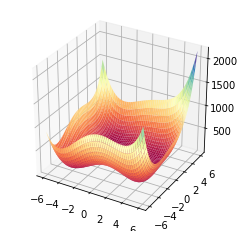

In [13]:
x1, x2, x3 = f_plot(f_himmelblau(), 6)

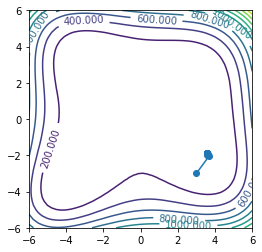

In [14]:
contoursteps(x1, x2, x3, steps_himmelblau)


## Demonstration of the work of the algorithm on 

>Spherical function (DeJong №1):

$f(x,y)=x^2+y^2$

In [15]:
k_spherical, x_min_spherical, steps_spherical = method_of_steepest_descent(f_spherical(), 5.12, 2, 1000, np.array([1,2]))
print('Spherical predicted: [0, 0]')
print(x_min_spherical, k_spherical)

Spherical predicted: [0, 0]
[7.45058048590153e-9 1.49011609718031e-8] 1


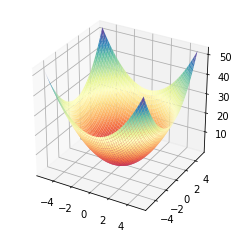

In [16]:
x1, x2, x3 = f_plot(f_spherical(), 5.12)

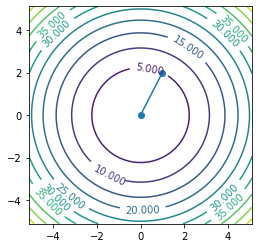

In [17]:
contoursteps(x1, x2, x3, steps_spherical)

## Demonstration of the work of the algorithm on

>Multimodal function №1:

$f(x,y)=x^2+y^2-cos(18x)-cos(18y)$

In [18]:
k_m, x_min_m, steps_m = method_of_steepest_descent(f_multimodal(), 1, 2, 1000, np.array([0.15,0.15]))
print(x_min_m, k_m)

[-0.346923637110285 -0.346923637110285] 1


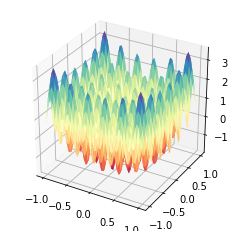

In [19]:
x1, x2, x3 = f_plot(f_multimodal(), 1)

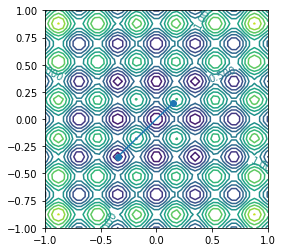

In [20]:
contoursteps(x1, x2, x3, steps_m)